## 0. Library Importation

In [1]:
# Gestion du système et des fichiers
import os
import sys
import subprocess

# Manipulation des données XML (Sorties de SUMO)
import xml.etree.ElementTree as ET

# Analyse de données
import pandas as pd
import numpy as np

# Visualisation et Graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration optionnelle pour rendre les graphiques plus jolis
sns.set_theme(style="whitegrid")

from utils import launch_simulation, analyze_tripinfo, analyze_emissions, analyze_queues, analyze_network_speed

## 1. Simulation Execution

## 2. Results Analysis and Visualization

In [3]:
def setup_scenario(scenario_name, net_file, route_file):
    # Noms des fichiers spécifiques à ce scénario
    add_file = f"outputs_{scenario_name}.add.xml"
    lane_out = f"lane_output_{scenario_name}.xml"
    config_file = f"simu_{scenario_name}.sumocfg"

    # 1. Création du fichier additionnel (.add.xml)
    add_content = f"""<additional>
    <edgeData id="stats_{scenario_name}" freq="60" file="{lane_out}" withMaxJam="true"/>
</additional>"""
    with open(add_file, "w") as f: f.write(add_content)

    # 2. Création du fichier de config (.sumocfg)
    config_content = f"""<?xml version="1.0" encoding="UTF-8"?>
<configuration>
    <input>
        <net-file value="{net_file}"/>
        <route-files value="{route_file}"/>
        <additional-files value="{add_file}"/>
    </input>
    <time><begin value="0"/><end value="3600"/></time>
</configuration>"""
    with open(config_file, "w") as f: f.write(config_content)

    return config_file, lane_out

In [4]:
# --- SCÉNARIO 1 : Référence (Base) ---
cfg1, lane1 = setup_scenario("base", "ff_TSC_modified.net.xml", "ff_heterogeneous.rou.xml")
launch_simulation(cfg1, tripinfo_out="tripinfo_base.xml", summary_out="summary_base.xml", lane_out=lane1)

# --- SCÉNARIO 2 : Solution Améliorée ---

cfg2, lane2 = setup_scenario("modified", "ff_TSC_modified.net.xml", "ff_heterogeneous.rou.xml")
launch_simulation(cfg2, tripinfo_out="tripinfo_modified.xml", summary_out="summary_modified.xml", lane_out=lane2)

Lancement de la simulation...
✅ Simulation terminée. Fichiers créés : tripinfo_base.xml, summary_base.xml, lane_output_base.xml
Lancement de la simulation...
✅ Simulation terminée. Fichiers créés : tripinfo_modified.xml, summary_modified.xml, lane_output_modified.xml


--- Rapport Écologique ---
Émission totale de CO2: 2237475.16 g
Consommation moyenne de carburant: 145.57 mL/véhicule


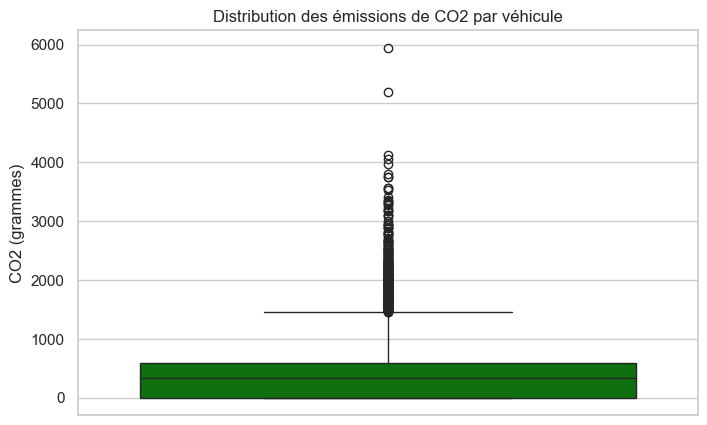

--- Rapport Écologique ---
Émission totale de CO2: 2237475.16 g
Consommation moyenne de carburant: 145.57 mL/véhicule


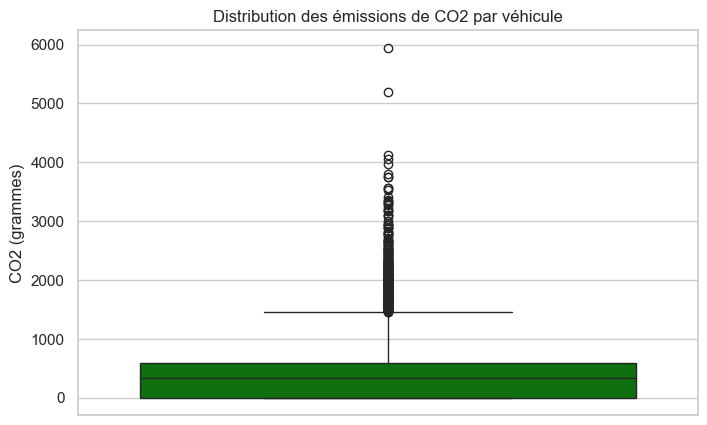

In [6]:
analyze_emissions(filename='tripinfo_base.xml')
analyze_emissions(filename='tripinfo_modified.xml')

Analyse de 4981 véhicules terminée.
Average Duration: 384.71s
Average Waiting Time: 227.51s
Average Time Loss: 282.13s


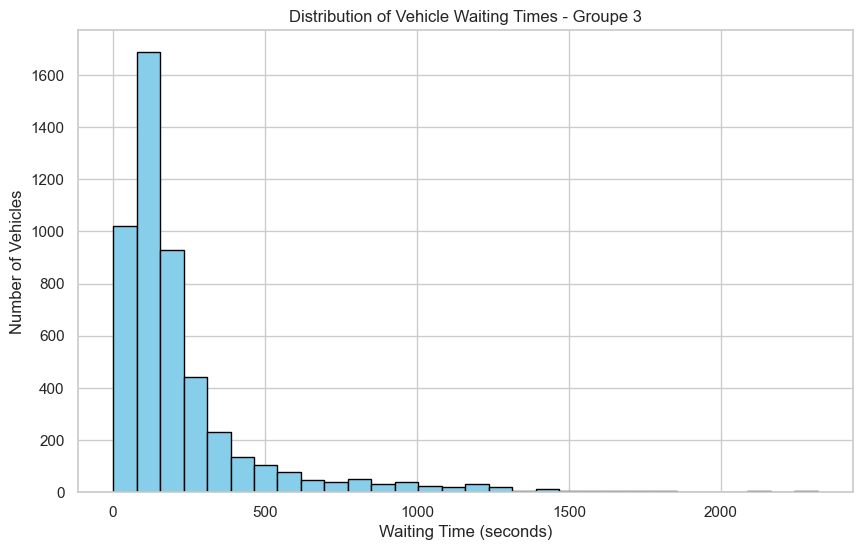

Analyse de 4981 véhicules terminée.
Average Duration: 384.71s
Average Waiting Time: 227.51s
Average Time Loss: 282.13s


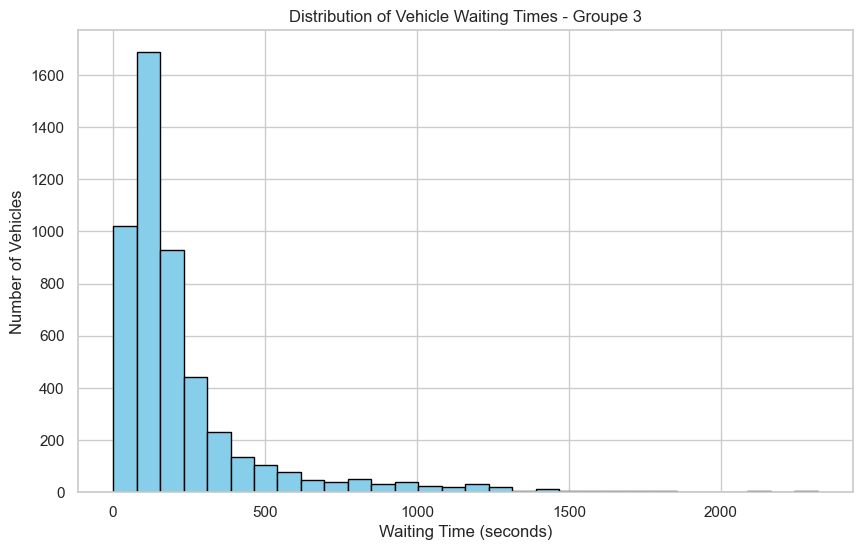

In [8]:
analyze_tripinfo(filename='tripinfo_base.xml')
analyze_tripinfo(filename='tripinfo_modified.xml')

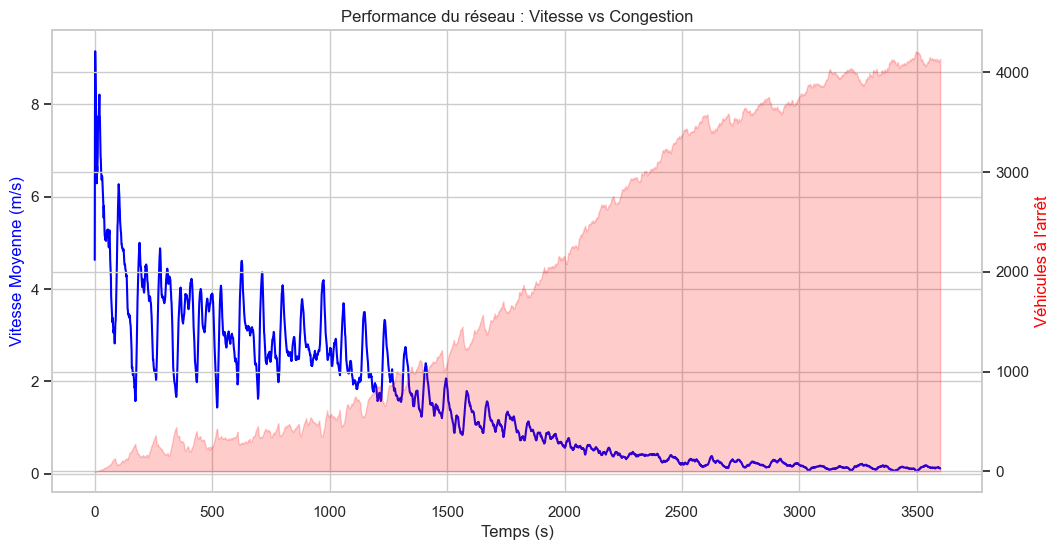

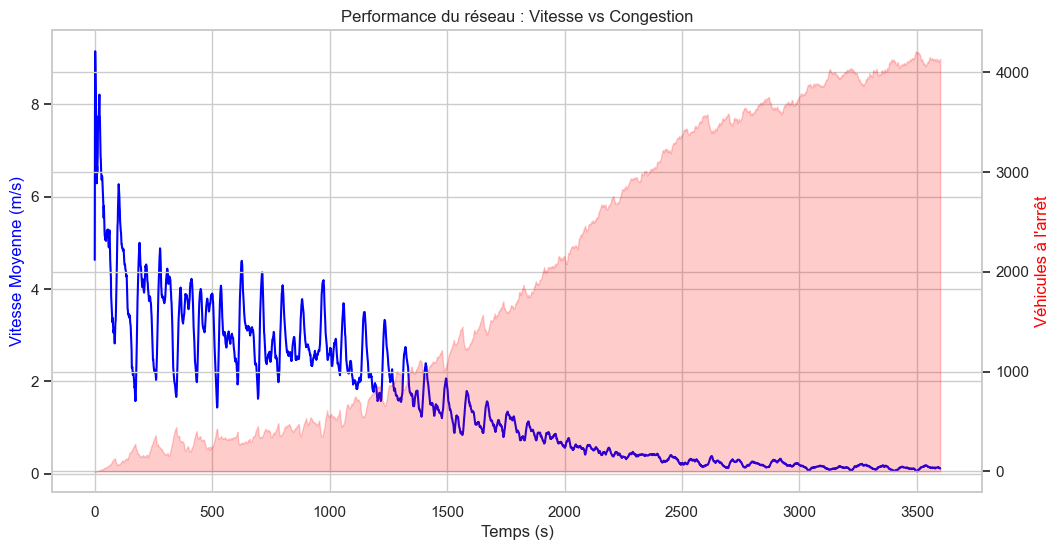

In [7]:
analyze_network_speed(filename='summary_base.xml')
analyze_network_speed(filename='summary_modified.xml')